In [1]:
import pd3
study = pd3.Study()
study.load_file("/home/reap2020/notebooks/spaghetti.pb")

True

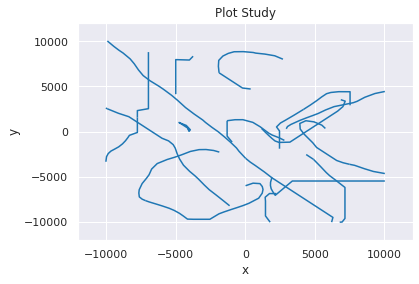

In [60]:
import importlib
import pd3_plot
importlib.reload(pd3_plot)
from pd3_plot import normalize, plot_2D, plot_3D
import Graph
importlib.reload(Graph)
from Graph import Graph
x = normalize(1,0,0)
y = normalize(0,1,0)

#Color schemes that can be passed in: "rainbow" or "pastel"
plot_2D(study) # Markus's code
plot_3D(study)